In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("TrainAndValid.csv", low_memory = False)

In [3]:
# Checking the data infos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
# Checking for missing data
data.isnull().sum()/len(data)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
saledate                    0.000000
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
T

In [5]:
# Columns names
data.columns

### DateTime features

Parsing DateTime

In [6]:
# New dataset with parse date and time feature
df = pd.read_csv("TrainAndValid.csv", low_memory = False, parse_dates = ["saledate"])

In [7]:
df.saledate.dtype

dtype('<M8[ns]')

In [8]:
df.saledate[:10]

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
5   2008-12-18
6   2004-08-26
7   2005-11-17
8   2009-08-27
9   2007-08-09
Name: saledate, dtype: datetime64[ns]

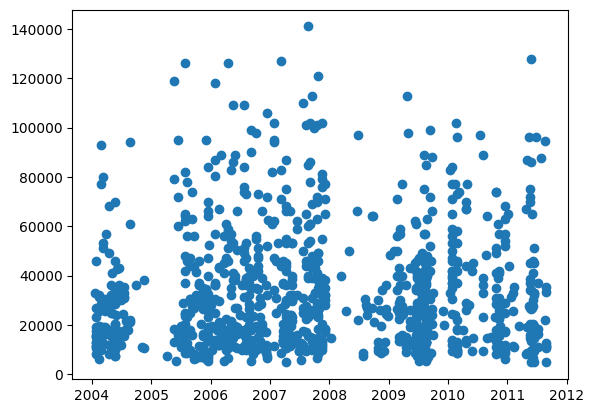

In [9]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])
plt.show()

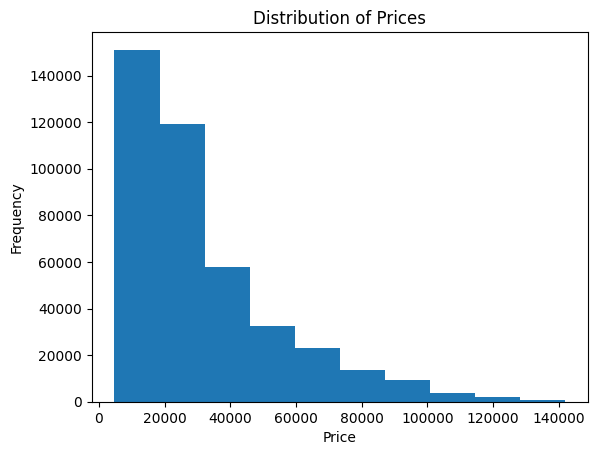

In [10]:
# Checking price distribution
df.SalePrice.plot.hist()
plt.title("Distribution of Prices")
plt.xlabel("Price")
plt.show()

In [11]:
# Sotring dataset by saledate
df.sort_values(by=["saledate"], inplace = True, ascending = True)
df.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [12]:
df_tmp = df.copy()

In [13]:
#Add parameters for saledate column

df_tmp["SaleYear"] = df_tmp.saledate.dt.year
df_tmp["SaleMonth"] = df_tmp.saledate.dt.month
df_tmp["SaleDay"] = df_tmp.saledate.dt.day
df_tmp["DayofWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["DayofYear"] = df_tmp.saledate.dt.dayofyear


In [14]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [15]:
df_tmp.drop("saledate", axis = 1, inplace = True)

In [16]:
df_tmp.to_csv("Dataset_date_parse.csv", index = False)

In [17]:
# Add other EDA and visualization

In [18]:
# Drop features with more than 70% of missing values

missing_list = []

for label in df_tmp.columns:
    if df_tmp[label].isnull().sum()/len(df_tmp)>0.70:
        missing_list.append(label)

In [19]:
missing_list, len(missing_list)

(['UsageBand',
  'fiModelSeries',
  'fiModelDescriptor',
  'Drive_System',
  'Pad_Type',
  'Stick',
  'Turbocharged',
  'Blade_Extension',
  'Blade_Width',
  'Enclosure_Type',
  'Engine_Horsepower',
  'Pushblock',
  'Ripper',
  'Scarifier',
  'Tip_Control',
  'Tire_Size',
  'Coupler_System',
  'Grouser_Tracks',
  'Hydraulics_Flow',
  'Track_Type',
  'Undercarriage_Pad_Width',
  'Stick_Length',
  'Thumb',
  'Pattern_Changer',
  'Grouser_Type',
  'Backhoe_Mounting',
  'Blade_Type',
  'Travel_Controls',
  'Differential_Type',
  'Steering_Controls'],
 30)

In [20]:
df_tmp.drop(missing_list, inplace = True, axis = 1)

In [21]:
df_tmp.isnull().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Enclosure                   0.000809
Forks                       0.520921
Ride_Control                0.629928
Transmission                0.544444
Hydraulics                  0.200062
Coupler                     0.465277
SaleYear                    0.000000
SaleMonth                   0.000000
SaleDay                     0.000000
DayofWeek                   0.000000
DayofYear                   0.000000
d

In [22]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   fiModelDesc               412698 non-null  object 
 9   fiBaseModel               412698 non-null  object 
 10  fiSecondaryDesc           271971 non-null  object 
 11  ProductSize               196093 non-null  object 
 12  fiProductClassDesc        412698 non-null  object 
 13  state                     412698 non-nu

In [23]:
# Filling numeric values

for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_tmp[label] = content.fillna(content.median())

In [24]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [25]:
# Turning non numeric features into categorical

for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [26]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              412698 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  412698 non-null  float64 
 8   fiModelDesc               412698 non-null  category
 9   fiBaseModel               412698 non-null  category
 10  fiSecondaryDesc           271971 non-null  category
 11  ProductSize               196093 non-null  category
 12  fiProductClassDesc        412698 non-null  category
 13  state                   

In [27]:
# Turning non numerical features into numbers and fill

for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp[label] = pd.Categorical(content).codes + 1

In [28]:
df_tmp.isnull().sum()/len(df_tmp)

SalesID                     0.0
SalePrice                   0.0
MachineID                   0.0
ModelID                     0.0
datasource                  0.0
auctioneerID                0.0
YearMade                    0.0
MachineHoursCurrentMeter    0.0
fiModelDesc                 0.0
fiBaseModel                 0.0
fiSecondaryDesc             0.0
ProductSize                 0.0
fiProductClassDesc          0.0
state                       0.0
ProductGroup                0.0
ProductGroupDesc            0.0
Enclosure                   0.0
Forks                       0.0
Ride_Control                0.0
Transmission                0.0
Hydraulics                  0.0
Coupler                     0.0
SaleYear                    0.0
SaleMonth                   0.0
SaleDay                     0.0
DayofWeek                   0.0
DayofYear                   0.0
dtype: float64

In [29]:
# Saving processed data

df_tmp.to_csv("TrainValid_tmp.csv", index = False)

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [31]:
# Creatinx X (features) and y (label)
df_val = df_tmp[df_tmp.SaleYear == 2012]
df_train = df_tmp[df_tmp.SaleYear != 2012]

X_train, y_train = df_train.drop("SalePrice", axis = 1), df_train["SalePrice"]
X_val, y_val = df_val.drop("SalePrice", axis = 1), df_val["SalePrice"]

In [32]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Calculates root mean squared log error between predictions and
    true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different leves
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    
    scores = {"Trainin MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_val, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_val, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "valid R^2": r2_score(y_val, val_preds)}
    return scores

In [33]:
# Change max_samples values
model = RandomForestRegressor(n_jobs = -1,
                              random_state = 42,
                              max_samples = 1000)

model.fit(X_train, y_train)

RandomForestRegressor(max_samples=1000, n_jobs=-1, random_state=42)

In [34]:
show_scores(model)

{'Trainin MAE': 7752.811121520723,
 'Valid MAE': 9374.47439643999,
 'Training RMSLE': 0.3467315923780778,
 'Valid RMSLE': 0.39251295718505286,
 'Training R^2': 0.7520925639837427,
 'valid R^2': 0.7398975184691199}

In [35]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters

rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples":[10000]}

# Instantiate RandomizeSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs = -1,
                                                    random_state = 42),
                              param_distributions = rf_grid,
                              n_iter = 10, 
                              cv = 5, 
                              verbose = True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [36]:
show_scores(rs_model)

{'Trainin MAE': 6193.040089507244,
 'Valid MAE': 7594.291765188173,
 'Training RMSLE': 0.28076519068447814,
 'Valid RMSLE': 0.3108463339630605,
 'Training R^2': 0.8300151955308551,
 'valid R^2': 0.8114668808565443}

In [37]:
rs_model.best_params_

{'n_estimators': 20,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [38]:
ideal_model = RandomForestRegressor(n_estimators = 80,
                                    min_samples_split = 16,
                                    min_samples_leaf = 5,
                                    max_samples = None,
                                    max_features = "sqrt",
                                    max_depth = None,
                                    random_state = 42)
ideal_model.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=16, n_estimators=80, random_state=42)

In [39]:
show_scores(ideal_model)

{'Trainin MAE': 4063.110976885707,
 'Valid MAE': 6224.265503692372,
 'Training RMSLE': 0.19212679184782,
 'Valid RMSLE': 0.25688147760060326,
 'Training R^2': 0.9237400350507231,
 'valid R^2': 0.8704596376147895}

In [40]:
importance = ideal_model.feature_importances_

In [41]:
# Helper function for ploting feature importance
def plot_feature(columns, importances, n = 20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending = False)
          .reset_index(drop = True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importances")
    ax.invert_yaxis()

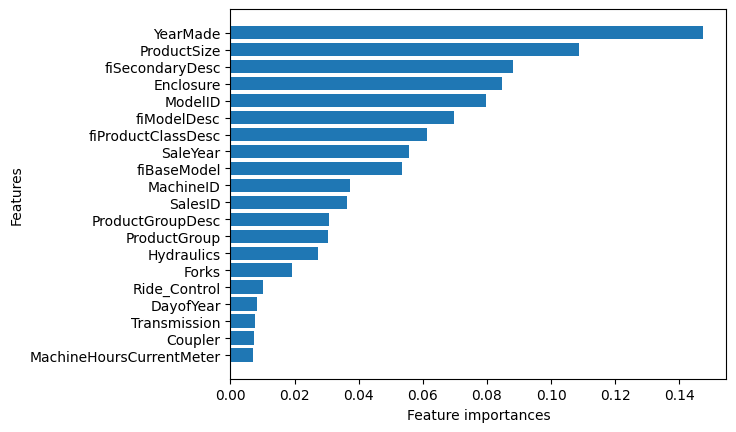

In [42]:
plot_feature(X_train.columns, ideal_model.feature_importances_)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=96cf5f10-502f-492e-9f46-36bdb4751390' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>